In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('~/Downloads/shot_logs.csv') # read in the csv file

df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [2]:
df.describe()

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,NaN,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,NaN,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,NaN,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [3]:
print(df.dtypes)
print(df.info())


GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                  

In [4]:
df.count()

GAME_ID                       128069
MATCHUP                       128069
LOCATION                      128069
W                             128069
FINAL_MARGIN                  128069
SHOT_NUMBER                   128069
PERIOD                        128069
GAME_CLOCK                    128069
SHOT_CLOCK                    122502
DRIBBLES                      128069
TOUCH_TIME                    128069
SHOT_DIST                     128069
PTS_TYPE                      128069
SHOT_RESULT                   128069
CLOSEST_DEFENDER              128069
CLOSEST_DEFENDER_PLAYER_ID    128069
CLOSE_DEF_DIST                128069
FGM                           128069
PTS                           128069
player_name                   128069
player_id                     128069
dtype: int64

In [5]:
# overall shooting percentage
float(len(df[df.SHOT_RESULT=="made"]))/len(df)*100.0

45.21390812764994

In [6]:
# impute missing shot clock values
df_grouped = df.groupby(by=['SHOT_CLOCK'])
print (df_grouped.describe())



                  CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST     DRIBBLES  \
SHOT_CLOCK                                                                  
0.0        count                   78.000000       78.000000    78.000000   
           mean                157494.089744        3.979487     2.410256   
           std                  78488.756037        2.349211     4.141760   
           min                   1717.000000        0.000000     0.000000   
           25%                 101128.500000        2.250000     0.000000   
           50%                 201963.500000        3.300000     1.000000   
           75%                 203088.250000        5.325000     3.000000   
           max                 204028.000000       11.400000    26.000000   
0.1        count                   67.000000       67.000000    67.000000   
           mean                175985.820896        3.949254     1.865672   
           std                  84472.649119        2.418638     4.327136   

In [7]:
# replace shot clock with game_clock
df_imputed = df
df_imputed["GAME_CLOCK"] = df_imputed["GAME_CLOCK"].str.replace(':', '.')
df_imputed["GAME_CLOCK"] = df_imputed["GAME_CLOCK"].convert_objects(convert_numeric=True)
df_imputed["SHOT_CLOCK"] = df_imputed["SHOT_CLOCK"].convert_objects(convert_numeric=True)
df_imputed["SHOT_CLOCK"] = df_imputed["SHOT_CLOCK"].fillna(value=df_imputed["GAME_CLOCK"])
print(df_imputed.SHOT_CLOCK)

0         10.80
1          3.40
2          0.00
3         10.30
4         10.90
5          9.10
6         14.50
7          3.40
8         12.40
9         17.40
10        16.00
11        12.10
12         4.30
13         4.40
14         6.80
15         6.40
16        17.60
17         8.70
18        20.80
19        17.50
20        19.50
21         6.00
22        15.70
23        11.20
24         0.04
25        17.10
26        15.40
27        12.30
28        18.20
29        11.90
          ...  
128039     7.90
128040     8.80
128041    10.30
128042     4.00
128043    12.10
128044     8.40
128045     9.00
128046    19.30
128047     7.30
128048     9.00
128049    11.00
128050    22.70
128051     0.16
128052    19.30
128053     3.20
128054     4.10
128055    13.80
128056     7.10
128057     7.30
128058    14.30
128059    19.80
128060    11.40
128061    19.00
128062     7.00
128063    15.30
128064    18.30
128065    19.80
128066    23.00
128067     9.10
128068     0.12
Name: SHOT_CLOCK, dtype:

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [8]:
# break up shot clock times
df_imputed2 = df_imputed
df_imputed2['SHOT_CLOCK'] = pd.cut(df_imputed2.SHOT_CLOCK,[0,8,16,24],3,labels=['0-8 sec','9-16 sec','17-24 sec']) # this creates a new variable
df_imputed2['CLOSE_DEF_DIST'] = pd.cut(df_imputed2.CLOSE_DEF_DIST,[0,3,8,100],3,labels=['Highly Contested','Contested','Wide Open']) # this creates a new variable

In [9]:
# drop null values 
df_imputed2.dropna(inplace=True)


# make SHOT_RESULT binary
shotresult = {"made":1 ,"missed" :0}
df_imputed2["SHOT_RESULT"] = df_imputed2["SHOT_RESULT"].apply(shotresult.get).astype(int)
print(df_imputed2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 126458 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       126458 non-null int64
MATCHUP                       126458 non-null object
LOCATION                      126458 non-null object
W                             126458 non-null object
FINAL_MARGIN                  126458 non-null int64
SHOT_NUMBER                   126458 non-null int64
PERIOD                        126458 non-null int64
GAME_CLOCK                    126458 non-null float64
SHOT_CLOCK                    126458 non-null category
DRIBBLES                      126458 non-null int64
TOUCH_TIME                    126458 non-null float64
SHOT_DIST                     126458 non-null float64
PTS_TYPE                      126458 non-null int64
SHOT_RESULT                   126458 non-null int64
CLOSEST_DEFENDER              126458 non-null object
CLOSEST_DEFENDER_PLAYER_ID    126458 non-null int64
CLOSE_DEF_DIST                126458 non-nul

In [10]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

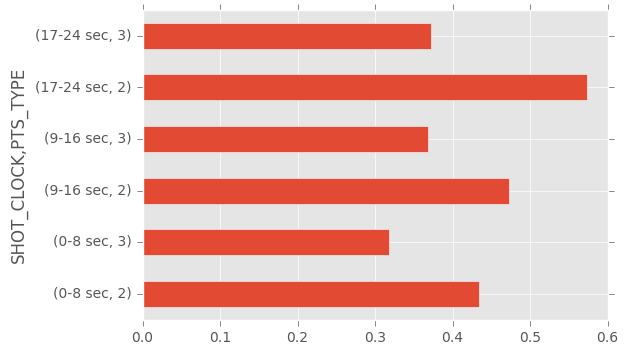

In [11]:
plt.style.use('ggplot')

df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK','PTS_TYPE'])
shooting_percentage = df_grouped.SHOT_RESULT.sum() / df_grouped.SHOT_RESULT.count()
ax = shooting_percentage.plot(kind='barh')

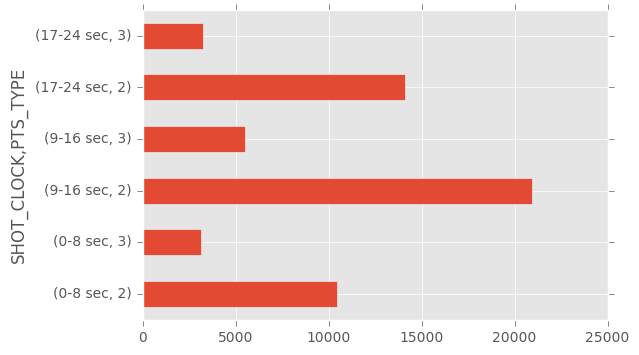

In [12]:
plt.style.use('ggplot')

df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK','PTS_TYPE'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

SHOT_RESULT                  False  True 
SHOT_CLOCK CLOSE_DEF_DIST                
0-8 sec    Highly Contested   7765   5387
           Contested         11463   7437
           Wide Open          1122    765
9-16 sec   Highly Contested  11891  10050
           Contested         18732  14754
           Wide Open          2120   1614
17-24 sec  Highly Contested   6581   7336
           Contested          8005   8370
           Wide Open          1406   1660


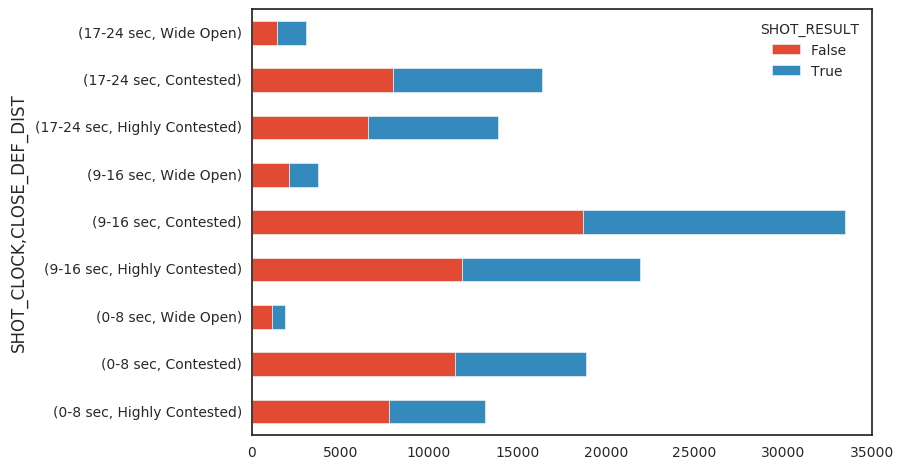

In [132]:
contestedShotsvsShotClock = pd.crosstab([df_imputed2['SHOT_CLOCK'], df_imputed2['CLOSE_DEF_DIST']], 
                       df_imputed2.SHOT_RESULT.astype(bool))
print(contestedShotsvsShotClock)

contestedShotsvsShotClock.plot(kind='barh', stacked=True)

In [14]:
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

In [15]:
for col in ['GAME_ID','MATCHUP','SHOT_NUMBER','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','PTS']:
    if col in df_imputed2:
        del df_imputed2[col]

In [16]:
# ax = scatter_matrix(df_imputed2,figsize=(15, 20))

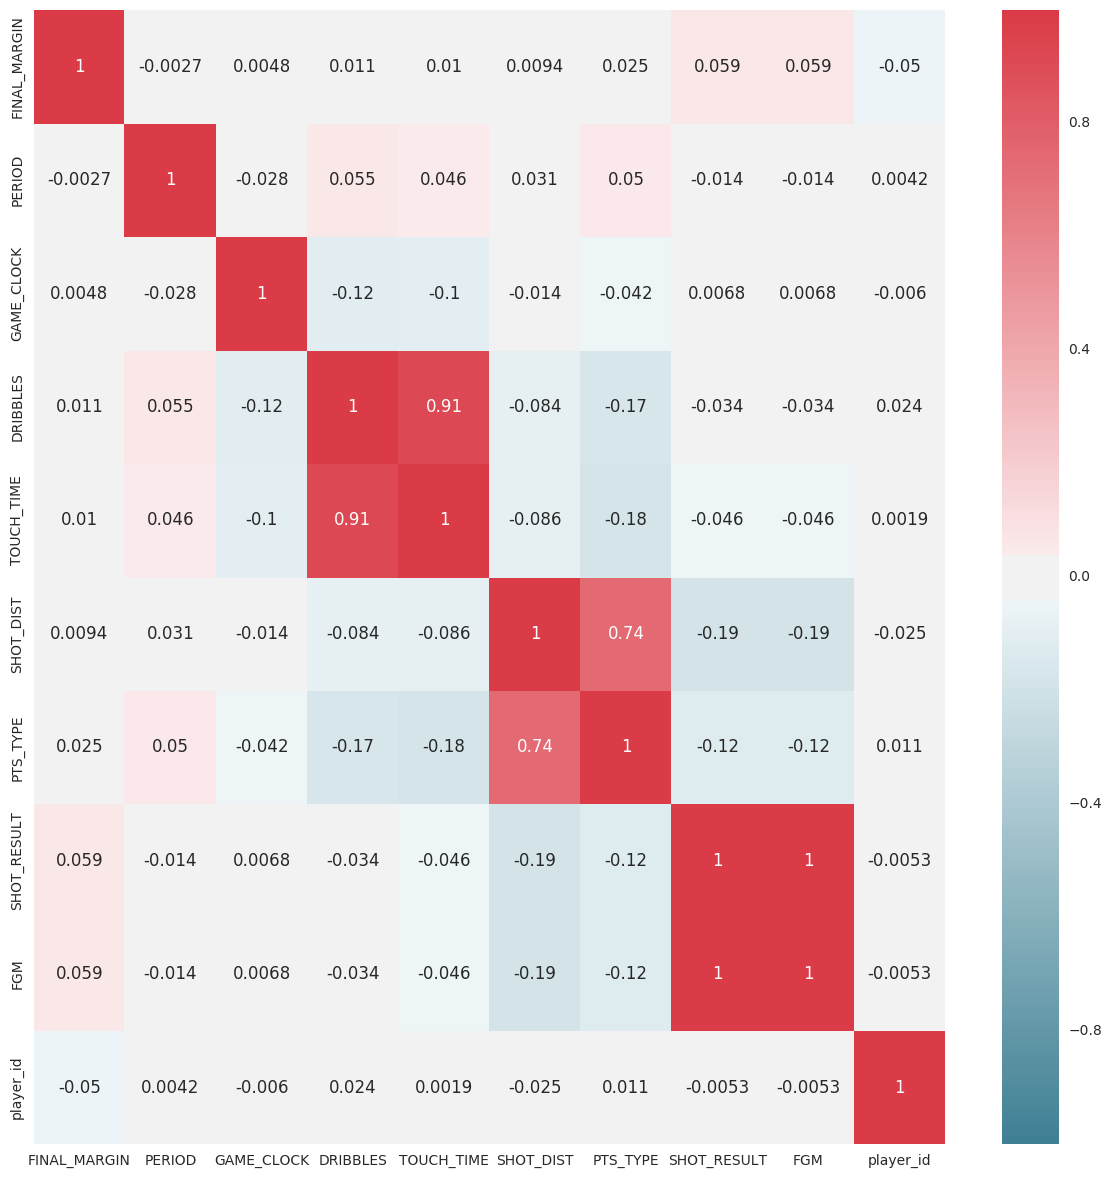

In [17]:
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df_imputed2.corr(), cmap=cmap, annot=True)

f.tight_layout()

ValueError: First argument must be a sequence

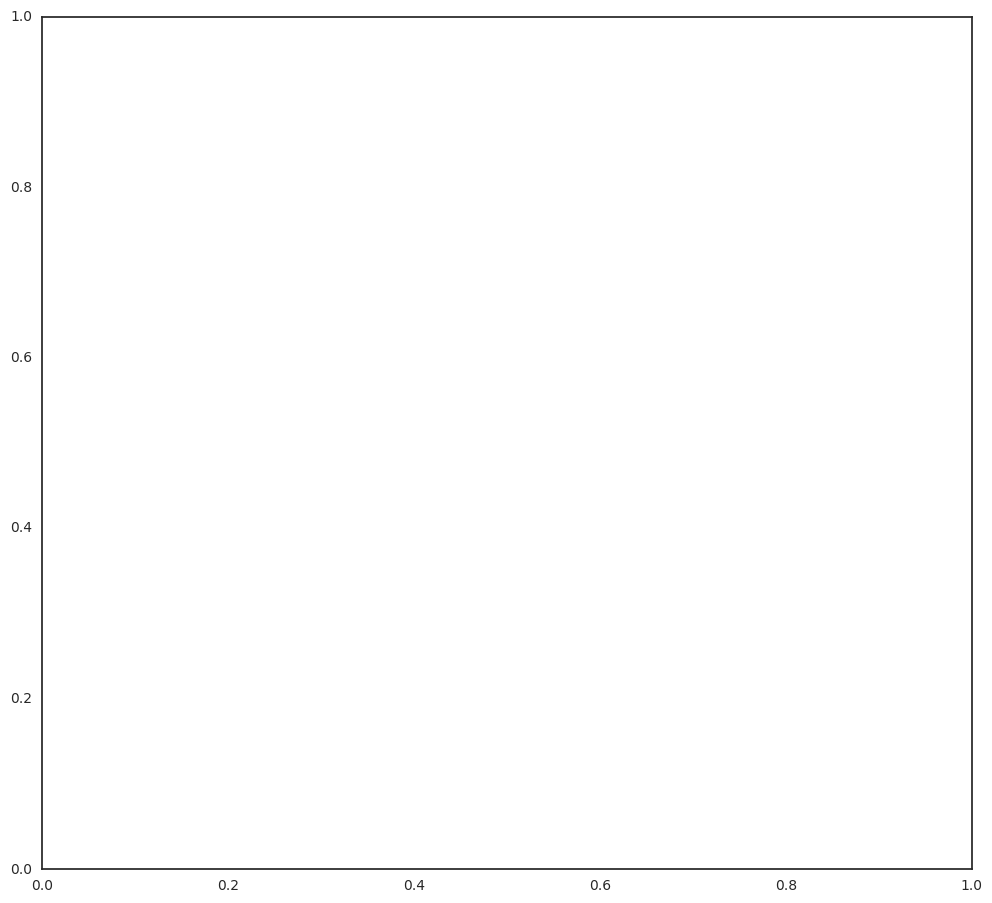

In [18]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(df_imputed2.CLOSE_DEF_DIST, df_imputed2.SHOT_DIST)
plt.show()

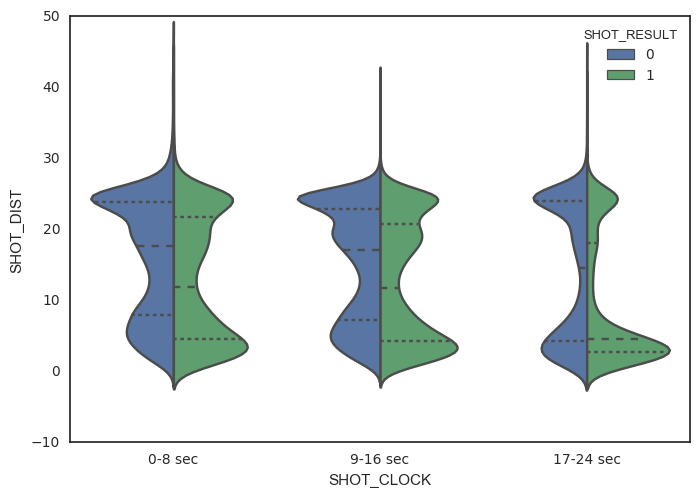

In [19]:
sns.violinplot(x="SHOT_CLOCK", y="SHOT_DIST", hue="SHOT_RESULT", data=df_imputed, 
               split=True, inner="quart")

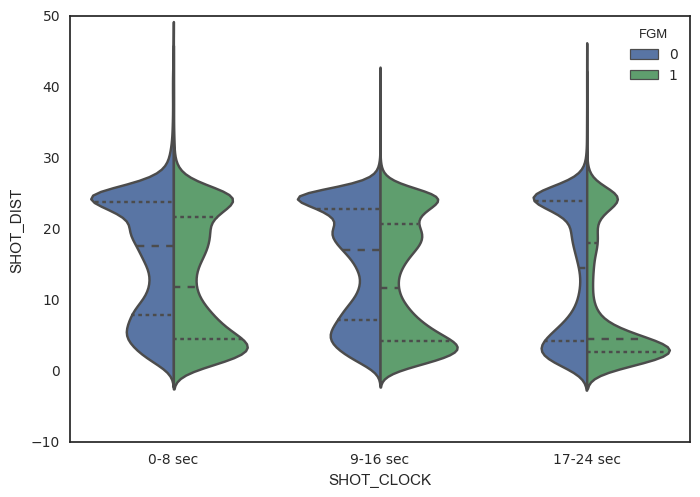

In [20]:
sns.violinplot(x="SHOT_CLOCK", y="SHOT_DIST", hue="FGM", data=df_imputed, 
               split=True, inner="quart")

In [21]:
## http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

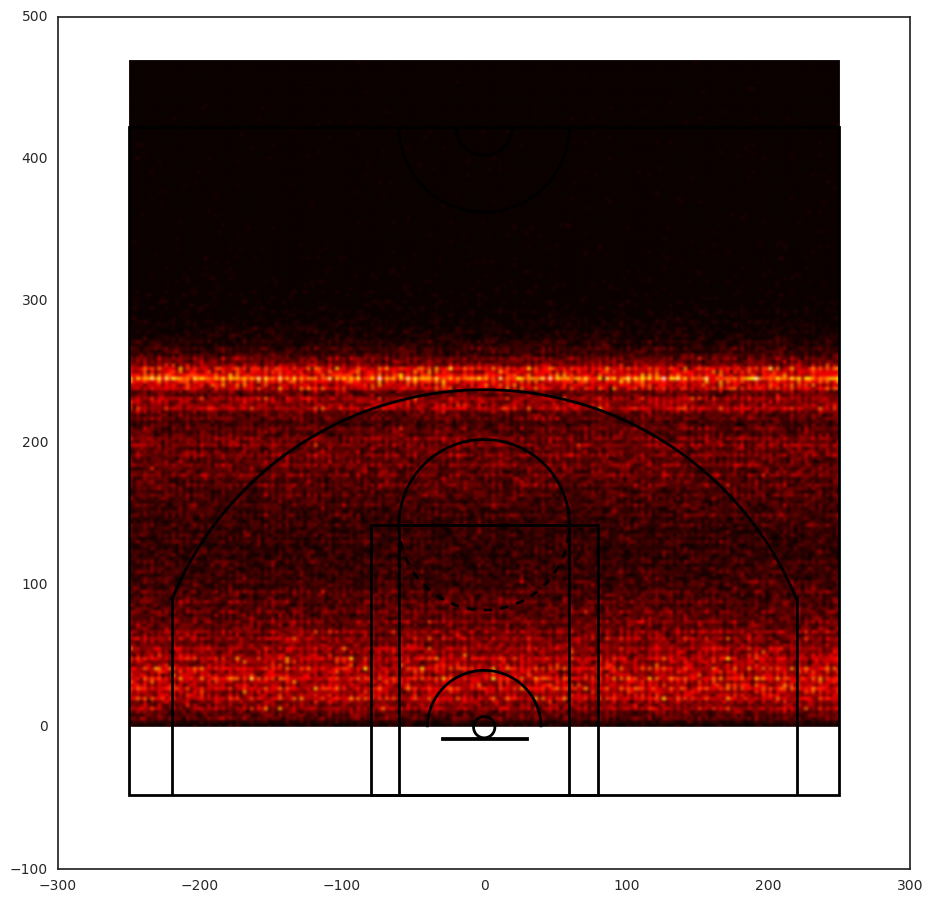

In [22]:
import numpy as np
import numpy.random

# Generate some test data
x = np.random.random_integers(-250, 250, 126458)
y = df_imputed2.SHOT_DIST * 10

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
# plt.scatter(x, y)
# plt.show()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', interpolation='gaussian')
plt.show()

In [24]:
df_lebron_james = df_imputed2.loc[df_imputed2['player_name'] == 'lebron james'].copy()
df_lebron_james.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 45834 to 46811
Data columns (total 15 columns):
LOCATION          959 non-null object
W                 959 non-null object
FINAL_MARGIN      959 non-null int64
PERIOD            959 non-null int64
GAME_CLOCK        959 non-null float64
SHOT_CLOCK        959 non-null category
DRIBBLES          959 non-null int64
TOUCH_TIME        959 non-null float64
SHOT_DIST         959 non-null float64
PTS_TYPE          959 non-null int64
SHOT_RESULT       959 non-null int64
CLOSE_DEF_DIST    959 non-null category
FGM               959 non-null int64
player_name       959 non-null object
player_id         959 non-null int64
dtypes: category(2), float64(3), int64(7), object(3)
memory usage: 106.8+ KB


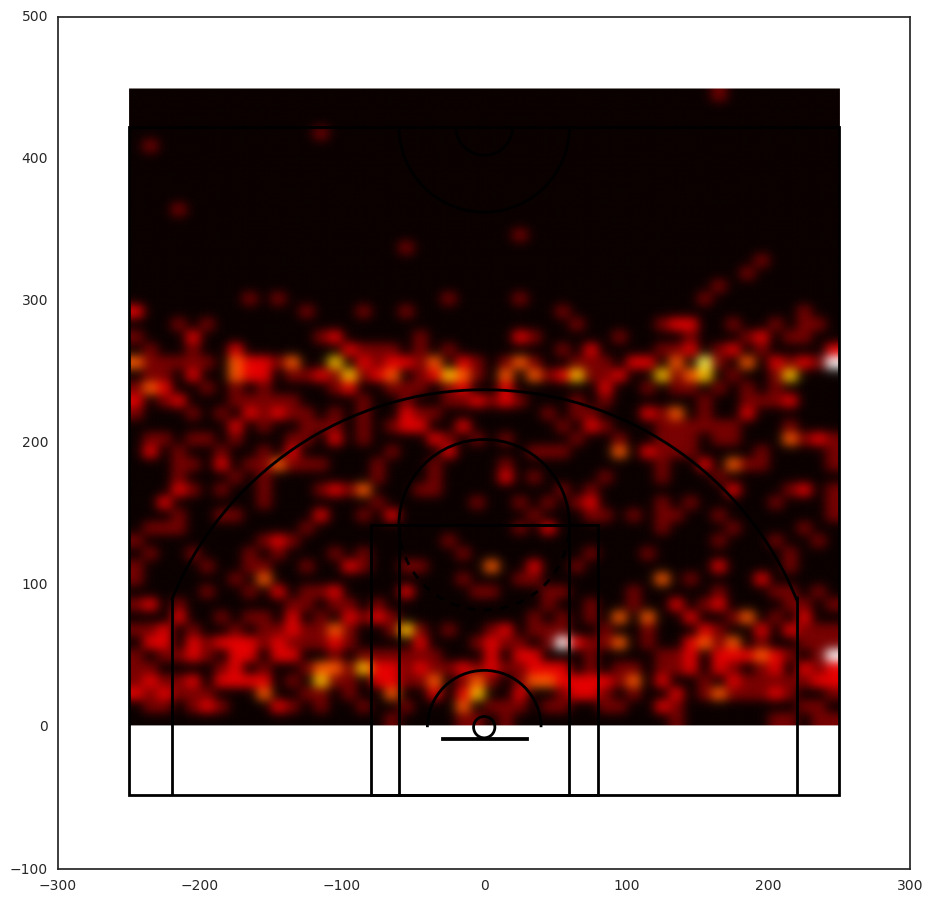

In [25]:
x = np.random.random_integers(-250, 250, 959)
y = df_lebron_james.SHOT_DIST * 10

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
# plt.scatter(x, y)
# plt.show()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', interpolation='gaussian')
plt.show()

In [26]:
df_steph_curry = df_imputed2.loc[df_imputed2['player_name'] == 'stephen curry'].copy()

In [27]:
df_steph_curryMade = df_steph_curry.loc[df_steph_curry['SHOT_RESULT'] == 1]
df_steph_curryMade.count()

df_steph_curryMissed = df_steph_curry.loc[df_steph_curry['SHOT_RESULT'] == 0]
df_steph_curryMissed.count()

LOCATION          496
W                 496
FINAL_MARGIN      496
PERIOD            496
GAME_CLOCK        496
SHOT_CLOCK        496
DRIBBLES          496
TOUCH_TIME        496
SHOT_DIST         496
PTS_TYPE          496
SHOT_RESULT       496
CLOSE_DEF_DIST    496
FGM               496
player_name       496
player_id         496
dtype: int64

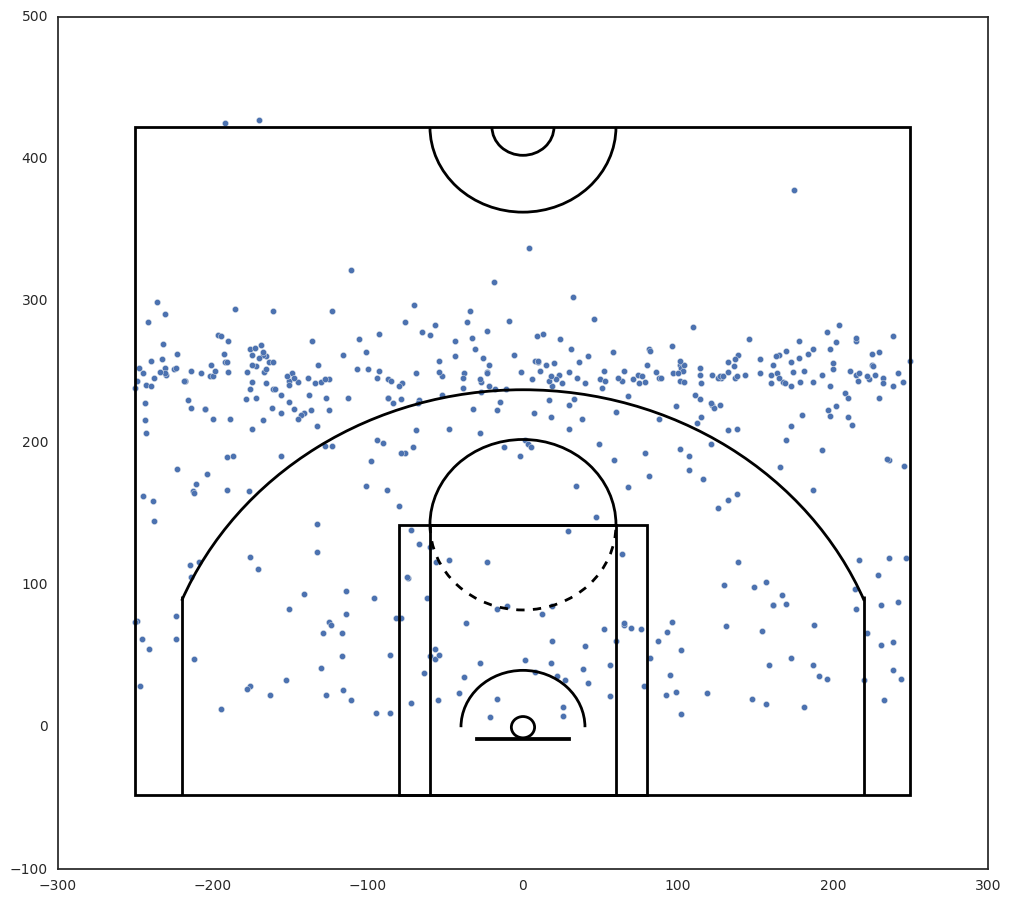

In [28]:
x = np.random.random_integers(-250, 250, 466)
y = df_steph_curryMade.SHOT_DIST * 10

x1 = np.random.random_integers(-250, 250, 496)
y1 = df_steph_curryMissed.SHOT_DIST * 10


sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.scatter(x1, y1)
plt.show()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.scatter(x1, y1, c='red')
# plt.scatter(x, y, c='blue')
# plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', interpolation='gaussian')
plt.show()

In [29]:
df_deandre_jordan = df_imputed2.loc[df_imputed2['player_name'] == 'deandre jordan'].copy()


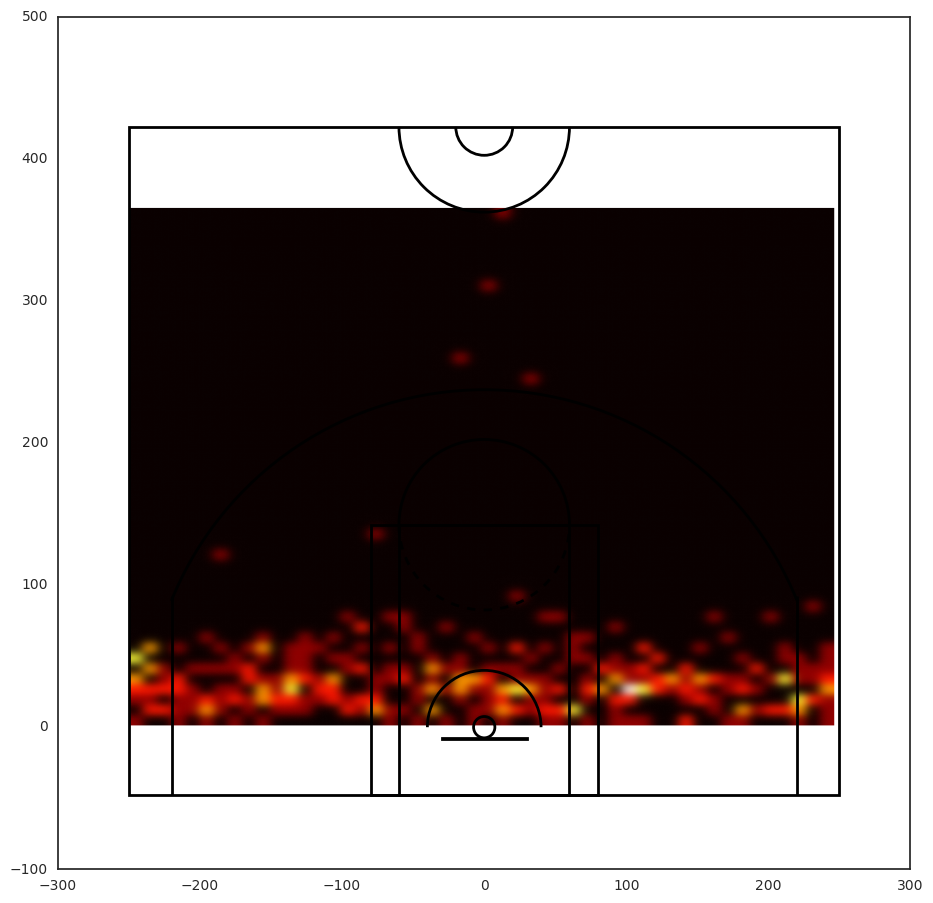

In [30]:
x = np.random.random_integers(-250, 250, 378)
y = df_deandre_jordan.SHOT_DIST * 10

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
# plt.scatter(x, y)
# plt.show()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', interpolation='gaussian')
plt.show()

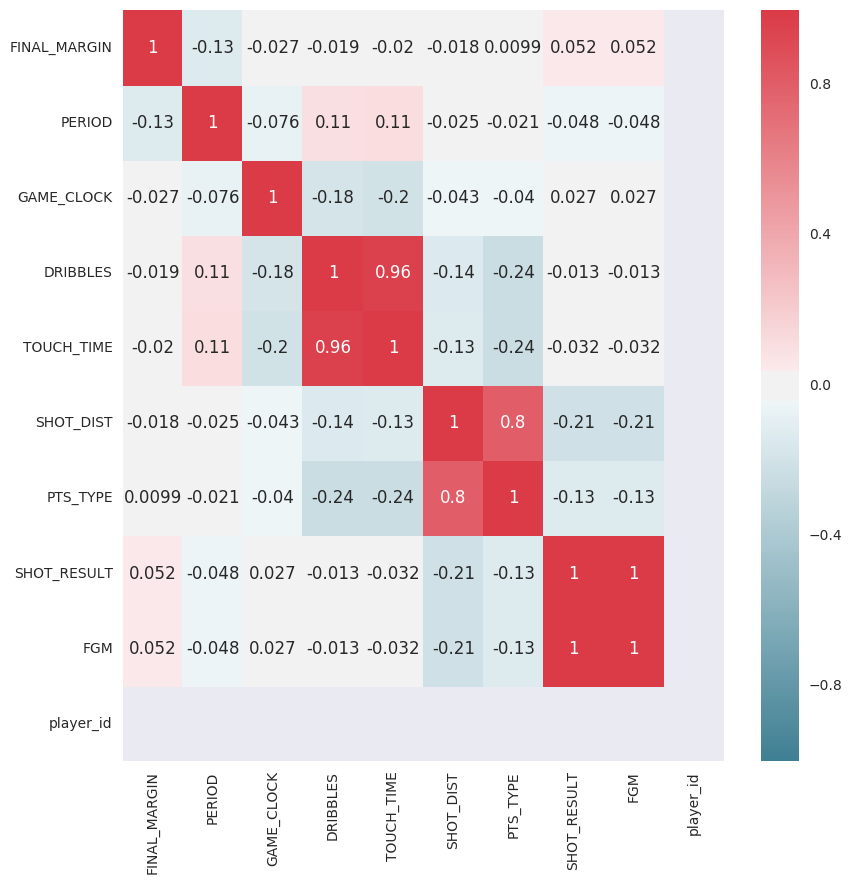

In [31]:
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_steph_curry.corr(), cmap=cmap, annot=True)

f.tight_layout()

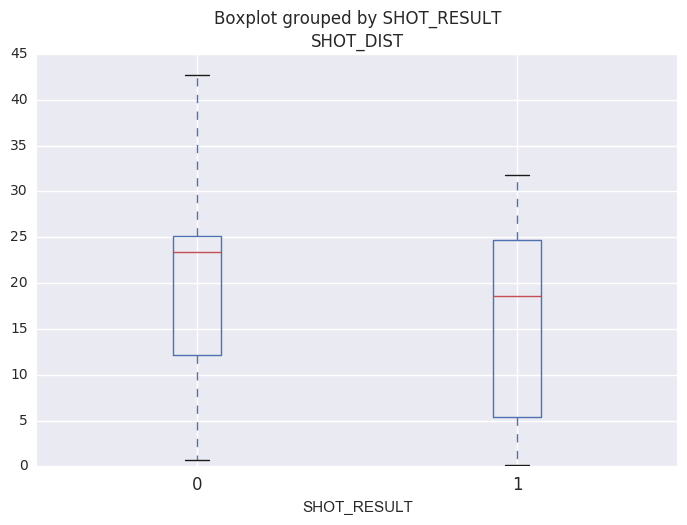

In [32]:
df_steph_curry.boxplot(column='SHOT_DIST', by = 'SHOT_RESULT')

In [33]:
df_imputed_jitter = df_steph_curry.copy()
df_imputed_jitter[['SHOT_DIST','CLOSE_DEF_DIST','TOUCH_TIME']] = df_imputed_jitter[['SHOT_DIST','CLOSE_DEF_DIST','TOUCH_TIME']].values + np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df_imputed_jitter, hue="SHOT_RESULT", size=2)

TypeError: Can't convert 'float' object to str implicitly

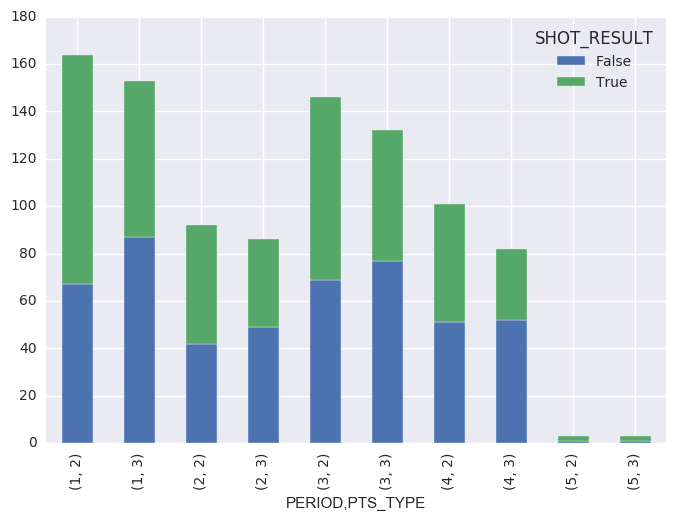

In [34]:
STEPHquarterShots = pd.crosstab([df_steph_curry['PERIOD'], df_steph_curry['PTS_TYPE']], 
                       df_steph_curry.SHOT_RESULT.astype(bool))

STEPHquarterShots.plot(kind='bar', stacked=True)

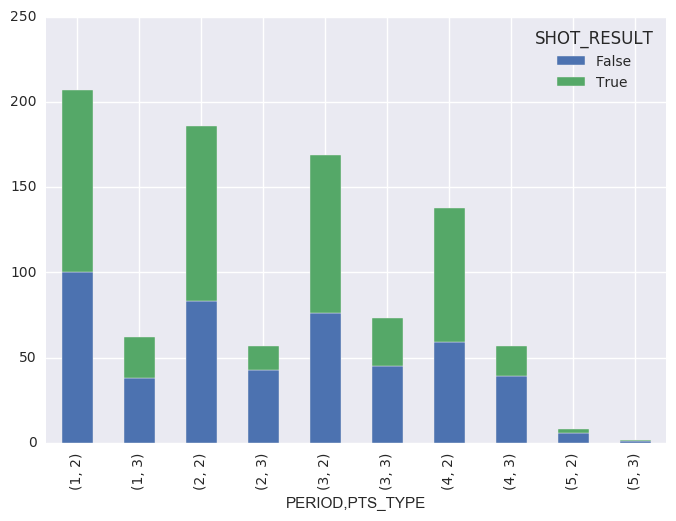

In [35]:
LJquarterShots = pd.crosstab([df_lebron_james['PERIOD'], df_lebron_james['PTS_TYPE']], 
                       df_lebron_james.SHOT_RESULT.astype(bool))

LJquarterShots.plot(kind='bar', stacked=True)

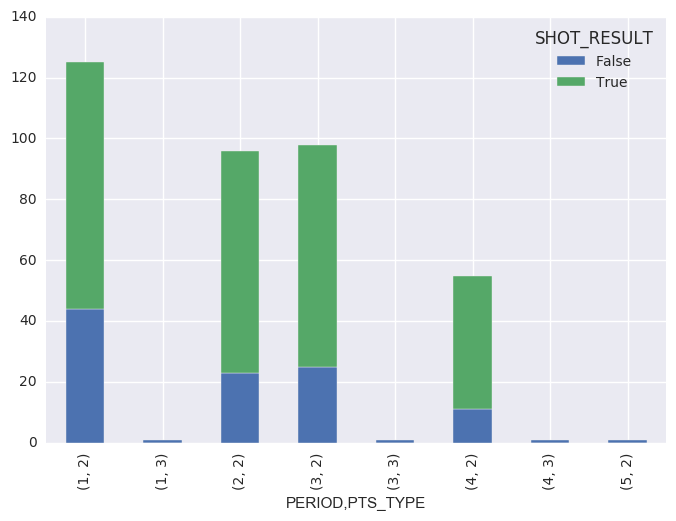

In [36]:
DJquarterShots = pd.crosstab([df_deandre_jordan['PERIOD'], df_deandre_jordan['PTS_TYPE']], 
                       df_deandre_jordan.SHOT_RESULT.astype(bool))

DJquarterShots.plot(kind='bar', stacked=True)

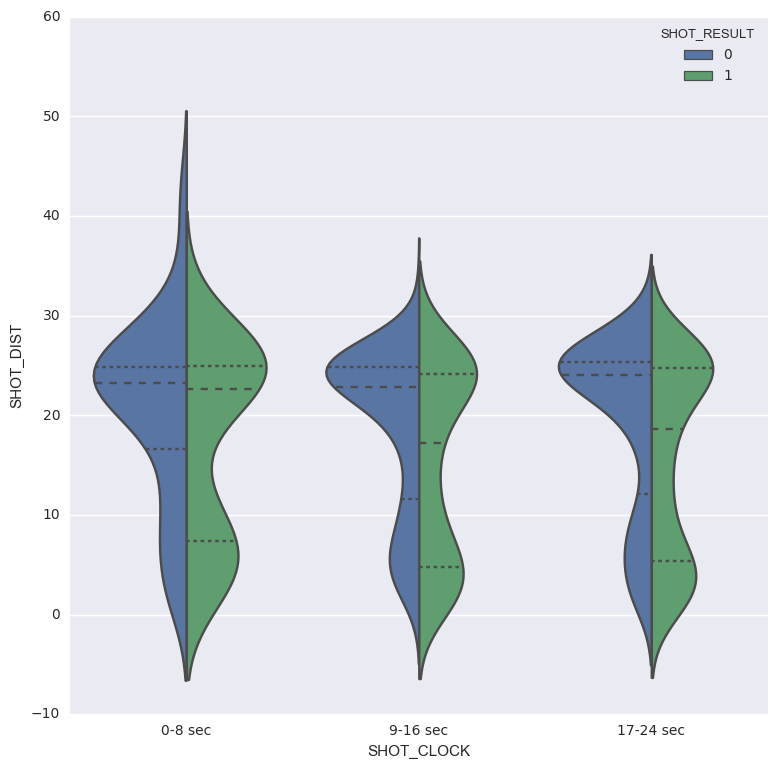

In [37]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="SHOT_CLOCK", y="SHOT_DIST", hue="SHOT_RESULT", data=df_steph_curry, 
               split=True, inner="quart")

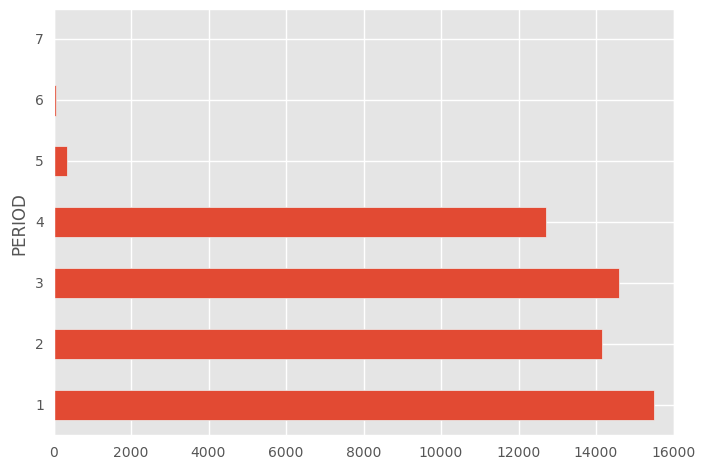

In [38]:
plt.style.use('ggplot')

df_grouped = df_imputed2.groupby(by=['PERIOD'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

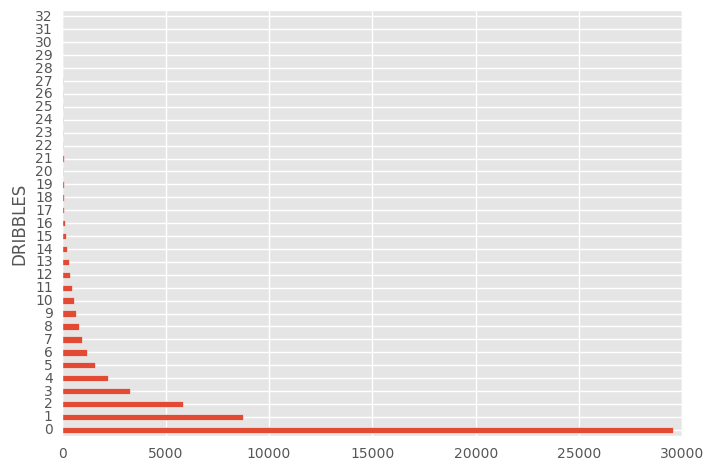

In [39]:
df_grouped = df_imputed2.groupby(by=['DRIBBLES'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')



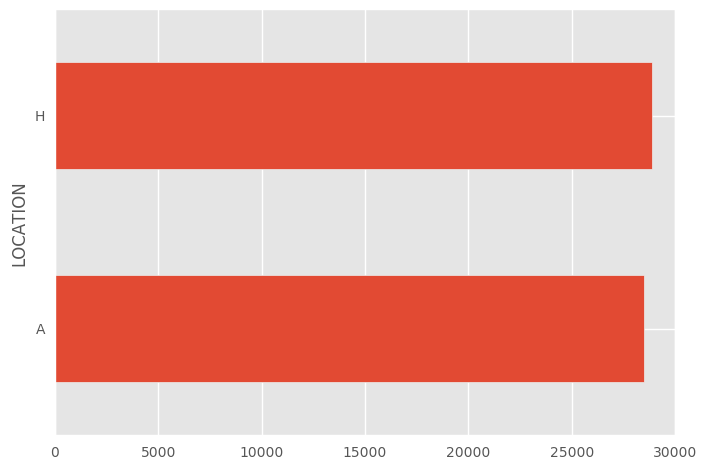

In [40]:
df_grouped = df_imputed2.groupby(by=['LOCATION'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

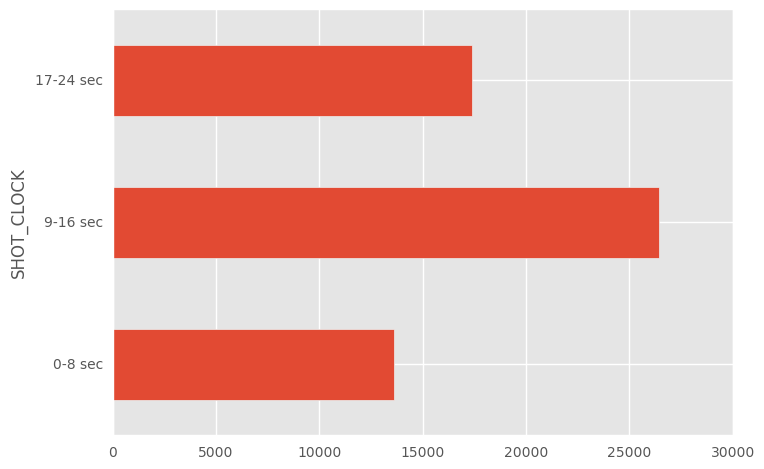

In [41]:
df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

In [42]:
df_imputed2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126458 entries, 0 to 128068
Data columns (total 15 columns):
LOCATION          126458 non-null object
W                 126458 non-null object
FINAL_MARGIN      126458 non-null int64
PERIOD            126458 non-null int64
GAME_CLOCK        126458 non-null float64
SHOT_CLOCK        126458 non-null category
DRIBBLES          126458 non-null int64
TOUCH_TIME        126458 non-null float64
SHOT_DIST         126458 non-null float64
PTS_TYPE          126458 non-null int64
SHOT_RESULT       126458 non-null int64
CLOSE_DEF_DIST    126458 non-null category
FGM               126458 non-null int64
player_name       126458 non-null object
player_id         126458 non-null int64
dtypes: category(2), float64(3), int64(7), object(3)
memory usage: 13.7+ MB


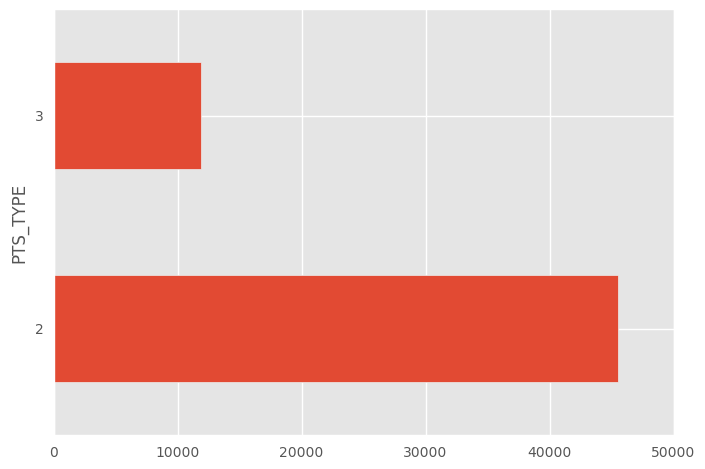

In [43]:
df_grouped = df_imputed2.groupby(by=['SHOT_CLOCK'],['CLOSE_DEF_DIST'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

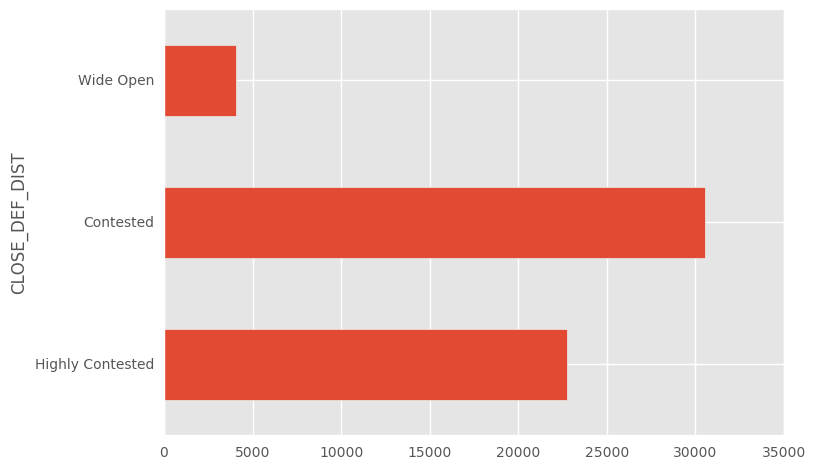

In [44]:
df_grouped = df_imputed2.groupby(by=['CLOSE_DEF_DIST'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')

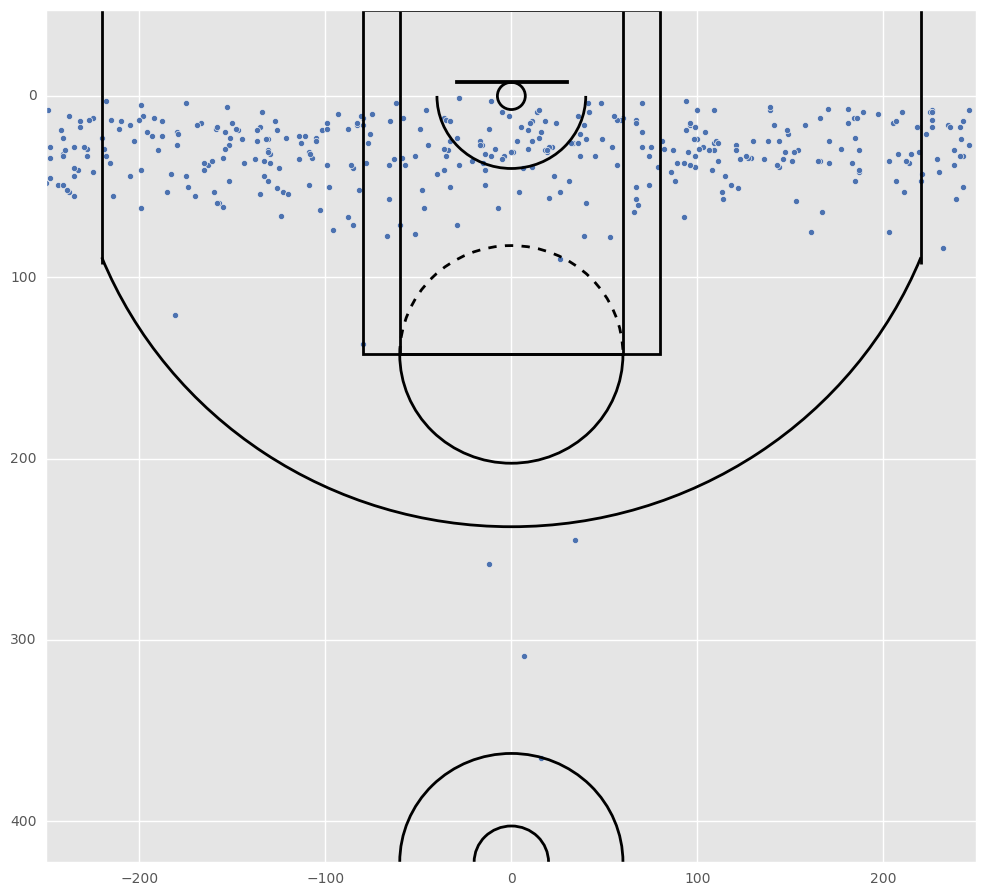

In [45]:
plt.figure(figsize=(12,11))
plt.scatter(x, y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

/Users/danh/anaconda/envs/machinelearning/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


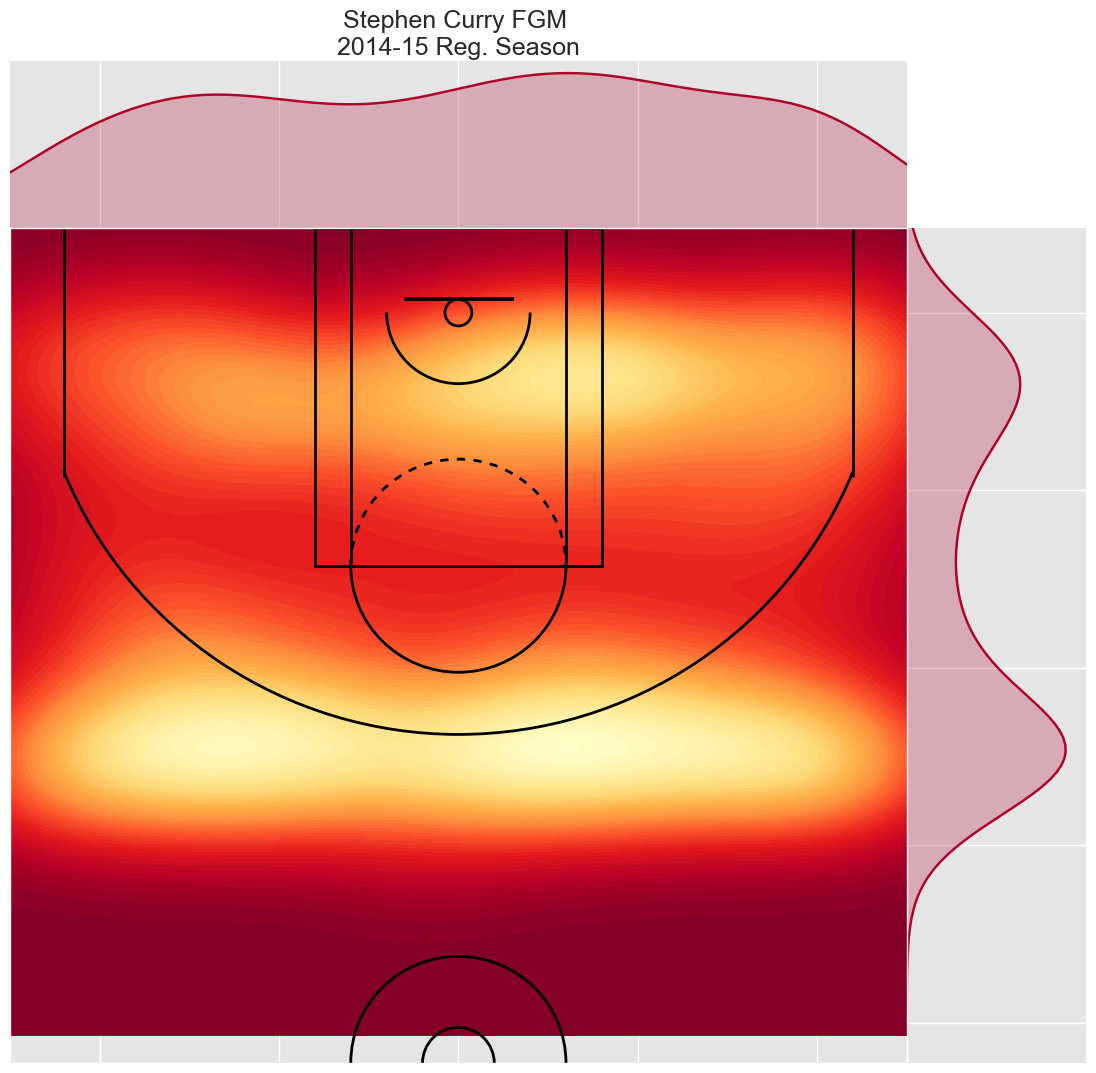

In [46]:
df_steph_curryMade = df_steph_curry.loc[df_steph_curry['SHOT_RESULT'] == 1]
x2 = np.random.random_integers(-250, 250, df_steph_curryMade.count()[0])
y2 = df_steph_curryMade.SHOT_DIST * 10
y3 = np.array(y2, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x2, y3, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Stephen Curry FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
plt.show()

In [ ]:
df_leagueMade = df_imputed2.loc[df_imputed2['SHOT_RESULT'] == 1]
x2 = np.random.random_integers(-250, 250, df_leagueMade.count()[0])
y2 = df_leagueMade.SHOT_DIST * 10
y3 = np.array(y2, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x2, y3, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('NBA LEAGUE FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
plt.show()

In [ ]:
df_lebronMade = df_lebron_james.loc[df_lebron_james['SHOT_RESULT'] == 1]
x = np.random.random_integers(-250, 250, df_lebronMade.count()[0])
y = df_lebronMade.SHOT_DIST * 10
y1 = np.array(y, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x, y1, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Lebron James FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
plt.show()

In [ ]:
import urllib.request
from matplotlib.offsetbox import  OffsetImage

# we pass in the link to the image as the 1st argument
# the 2nd argument tells urlretrieve what we want to scrape
pic = urllib.request.urlretrieve("http://l3.yimg.com/bt/api/res/1.2/jeu8WrJF.4ieHauC7cHcWQ--/YXBwaWQ9eW5ld3NfbGVnbztpbD1wbGFuZTtxPTc1O3c9NjAw/http://media.zenfs.com/en/person/Ysports/deandre-jordan-basketball-headshot-photo.jpg")

# urlretrieve returns a tuple with our image as the first 
# element and imread reads in the image as a 
# mutlidimensional numpy array so matplotlib can plot it
harden_pic = plt.imread(pic[0])

df_DeandreMade = df_deandre_jordan.loc[df_deandre_jordan['SHOT_RESULT'] == 1]
x = np.random.random_integers(-250, 250, df_DeandreMade.count()[0])
y = df_DeandreMade.SHOT_DIST * 10
y1 = np.array(y, dtype=pd.Series)
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(x, y1, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Deandre Jordan FGM \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

img = OffsetImage(harden_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
img.set_offset((625,621))
# add the image
ax.add_artist(img)

# Add Data Scource and Author
plt.show()

CLOSE_DEF_DIST       Highly Contested  Contested  Wide Open
SHOT_CLOCK PTS_TYPE                                        
0-8 sec    2                       28         30          0
           3                        8         47         10
9-16 sec   2                       90        107          6
           3                       22        137         14
17-24 sec  2                       99        138          8
           3                       25        154         39


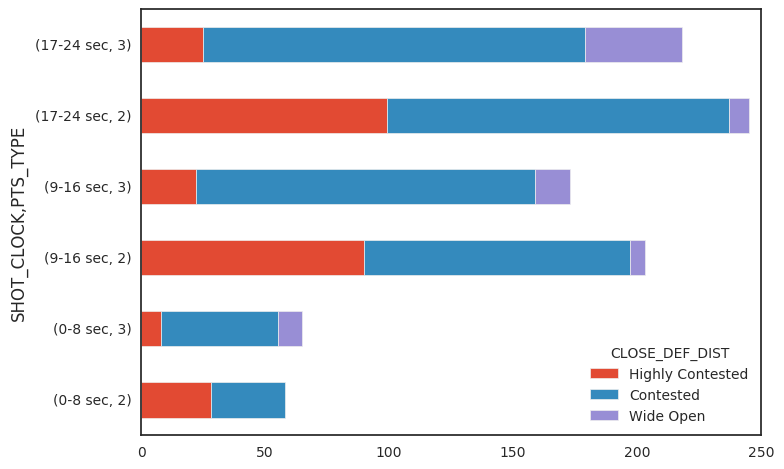

In [134]:

contestedShotsvsShotClock = pd.crosstab([df_steph_curry['SHOT_CLOCK'], df_steph_curry['PTS_TYPE']], 
                       df_steph_curry.CLOSE_DEF_DIST)
print(contestedShotsvsShotClock)

contestedShotsvsShotClock.plot(kind='barh', stacked=True)

SHOT_RESULT  False  True 
DRIBBLES                 
0              112    122
1               50     66
2               58     52
3               48     45
4               26     30
5               29     23
6               29     25
7               20      9
8               13     14
9               10     15
10              12     12
11              10      8
12               6      9
13              10      6
14              10      4
15              11      7
16               5      9
17               6      4
18               8      0
19               5      0
20               2      1
21               4      2
22               1      3
23               2      0
24               2      1
25               0      2
26               1      0


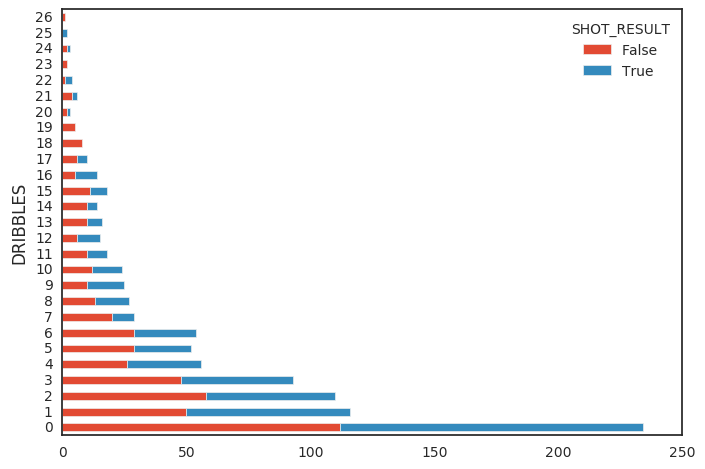

In [140]:
contestedShotsvsShotClock = pd.crosstab([df_lebron_james['DRIBBLES']], 
                       df_lebron_james.SHOT_RESULT.astype(bool))
print(contestedShotsvsShotClock)

contestedShotsvsShotClock.plot(kind='barh', stacked=True)

plt.style.use('ggplot')



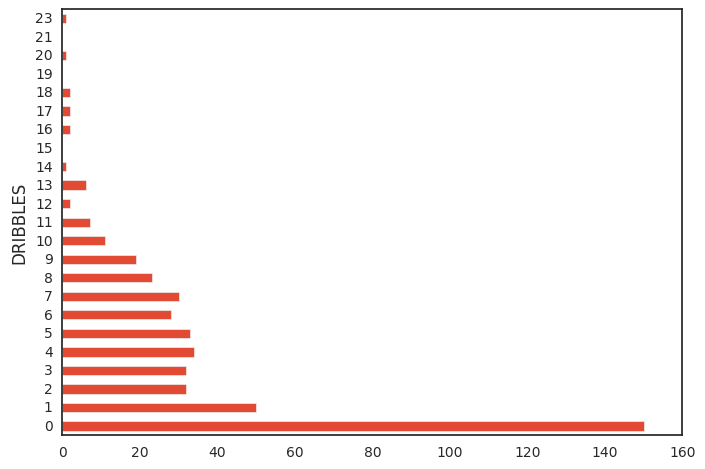

In [149]:
df_grouped = df_steph_curry.groupby(by=['DRIBBLES'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')


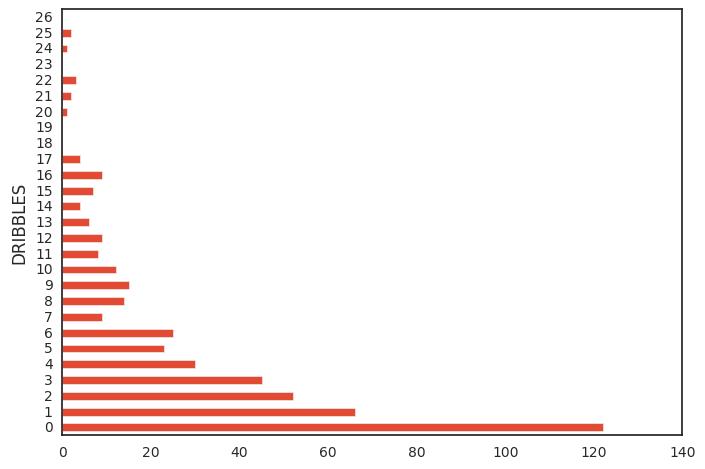

In [148]:
df_grouped = df_lebron_james.groupby(by=['DRIBBLES'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()

ax = shooting_percentage.plot(kind='barh')


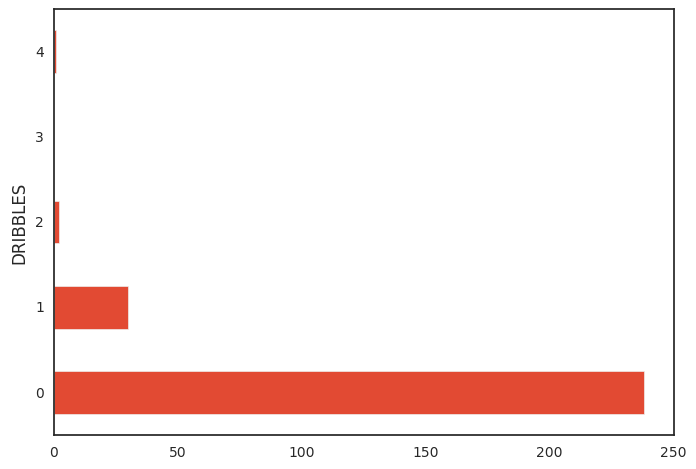

In [147]:
df_grouped = df_deandre_jordan.groupby(by=['DRIBBLES'])
shooting_percentage = df_grouped.SHOT_RESULT.sum()
ax = shooting_percentage.plot(kind='barh')
